# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [83]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [84]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [85]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [86]:
x_vals.shape

(200,)

In [87]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


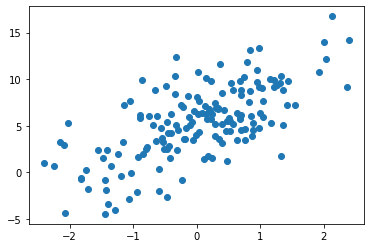

In [88]:
plt.scatter(x_train, y_train)

In [89]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [90]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [91]:
criterion = torch.nn.MSELoss() 

In [92]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 40.89262390136719
h: 2 | epoch: 50, loss: 36.376800537109375
h: 2 | epoch: 100, loss: 32.76222229003906
h: 3 | epoch: 0, loss: 40.11450958251953
h: 3 | epoch: 50, loss: 34.98048400878906
h: 3 | epoch: 100, loss: 30.228164672851562
h: 4 | epoch: 0, loss: 41.034725189208984
h: 4 | epoch: 50, loss: 35.18669128417969
h: 4 | epoch: 100, loss: 28.807348251342773
h: 5 | epoch: 0, loss: 43.07526397705078
h: 5 | epoch: 50, loss: 33.68544387817383
h: 5 | epoch: 100, loss: 23.76742935180664
h: 6 | epoch: 0, loss: 42.22687911987305
h: 6 | epoch: 50, loss: 31.51410484313965
h: 6 | epoch: 100, loss: 20.578317642211914
h: 7 | epoch: 0, loss: 44.51708221435547
h: 7 | epoch: 50, loss: 36.36765670776367
h: 7 | epoch: 100, loss: 28.869781494140625
h: 8 | epoch: 0, loss: 48.51008987426758
h: 8 | epoch: 50, loss: 30.661540985107422
h: 8 | epoch: 100, loss: 18.276123046875
h: 9 | epoch: 0, loss: 52.10231399536133
h: 9 | epoch: 50, loss: 31.78194808959961
h: 9 | epoch: 100, loss: 18.02

h: 66 | epoch: 0, loss: 41.850189208984375
h: 66 | epoch: 50, loss: 10.838932991027832
h: 66 | epoch: 100, loss: 9.150130271911621
h: 67 | epoch: 0, loss: 37.800994873046875
h: 67 | epoch: 50, loss: 11.659713745117188
h: 67 | epoch: 100, loss: 9.652835845947266
h: 68 | epoch: 0, loss: 46.753746032714844
h: 68 | epoch: 50, loss: 11.756872177124023
h: 68 | epoch: 100, loss: 9.174539566040039
h: 69 | epoch: 0, loss: 42.97294616699219
h: 69 | epoch: 50, loss: 10.277928352355957
h: 69 | epoch: 100, loss: 9.00672721862793
h: 70 | epoch: 0, loss: 40.51333236694336
h: 70 | epoch: 50, loss: 12.255406379699707
h: 70 | epoch: 100, loss: 9.431709289550781
h: 71 | epoch: 0, loss: 48.32328414916992
h: 71 | epoch: 50, loss: 11.168936729431152
h: 71 | epoch: 100, loss: 9.052412033081055
h: 72 | epoch: 0, loss: 44.228111267089844
h: 72 | epoch: 50, loss: 12.417367935180664
h: 72 | epoch: 100, loss: 9.423481941223145
h: 73 | epoch: 0, loss: 41.05350875854492
h: 73 | epoch: 50, loss: 12.740776062011719
h

In [93]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.980052 ]
 [ 2.8185399]
 [ 3.5982327]
 [ 5.509731 ]
 [ 7.9751782]
 [ 1.596123 ]
 [ 9.154981 ]
 [ 4.5229397]
 [ 6.030737 ]
 [ 6.4876404]
 [ 3.0577695]
 [ 2.9121735]
 [ 7.4901886]
 [ 3.4882636]
 [ 4.2836533]
 [ 2.7752972]
 [ 7.9776745]
 [ 9.555977 ]
 [ 6.7871466]
 [ 3.5858967]
 [ 1.8512007]
 [ 1.5109844]
 [ 5.2070236]
 [ 3.1232991]
 [ 1.7294595]
 [ 3.6016016]
 [ 4.2439575]
 [ 8.185083 ]
 [ 4.697767 ]
 [ 6.822424 ]
 [ 1.7913289]
 [ 5.8405585]
 [ 5.1999035]
 [ 8.808875 ]
 [ 2.5701704]
 [ 2.6531663]
 [ 1.3765547]
 [ 8.640722 ]
 [ 7.3380394]
 [ 6.379281 ]
 [ 7.0208044]
 [ 6.4599056]
 [ 5.47704  ]
 [ 6.243855 ]
 [ 6.9380965]
 [ 7.564792 ]
 [ 1.3023292]
 [ 7.179749 ]
 [ 8.143974 ]
 [ 3.6467338]
 [ 5.5127115]
 [ 2.6738992]
 [ 1.3450571]
 [ 6.0641594]
 [11.657995 ]
 [ 2.5931003]
 [ 5.9331703]
 [ 4.1744833]
 [ 9.30716  ]
 [ 7.0262537]
 [ 1.5097946]
 [ 5.0776668]
 [ 7.4879413]
 [ 3.9488049]
 [ 6.027166 ]
 [ 4.414653 ]
 [ 4.896964 ]
 [ 3.7843528]
 [ 2.129598 ]
 [ 8.547001 ]
 [ 3.7789226]
 [ 7.4

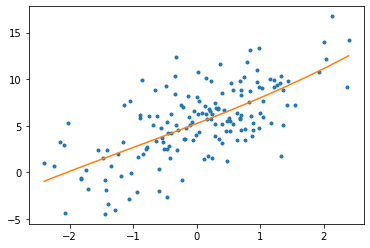

In [94]:
x_train = (x_train).reshape(160,)
y_train = (y_train).reshape(160,)

z = np.polyfit(x_train, y_train, 3)
p = np.poly1d(z)
xp = np.linspace(x_train.min(), x_train.max(), 100)

plt.plot(x_train, y_train, '.', xp, p(xp), '-')
plt.show()

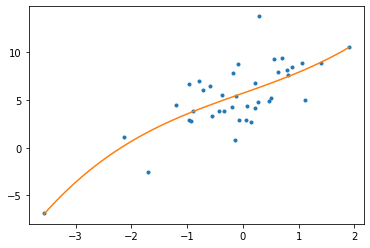

In [95]:
x_test = (x_test).reshape(40,)
y_test = (y_test).reshape(40,)

z = np.polyfit(x_test, y_test, 3)
p = np.poly1d(z)
xp = np.linspace(x_test.min(), x_test.max(), 100)

plt.plot(x_test, y_test, '.', xp, p(xp), '-')
plt.show()

(0.0, 100.0)

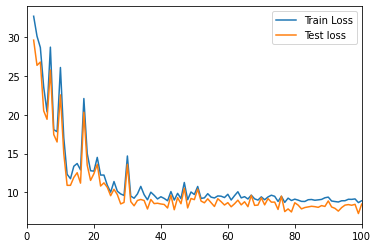

In [96]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

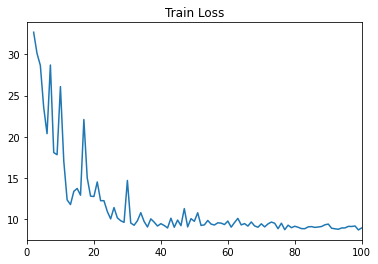

In [97]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

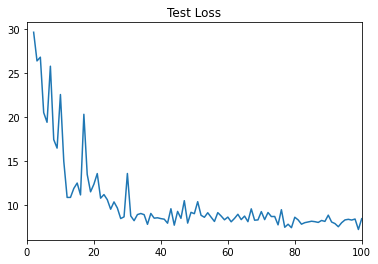

In [98]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)